# Statistics Coding Challenge #1

In this coding challenge, we are going to use the "Accidental Drug Related Deaths 2012-2017 (State of Connecticut)" data set available from the Data.Gov website (https://catalog.data.gov/dataset?groups=local&organization_type=State+Government#topic=local_navigation). 

There are 2 main objectives you need to accomplish:

1) First treat missing values for the "Death City" attribute - replace any missing values in the "Death City" with the city that has experienced the most number of deaths

For each city, do the following:

2) Compute summary statistics for the *age* attribute:


a) Mean

b) Median

c) 25%, 50% and 75% percentiles using [np.percentile](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.percentile.html)

d) Examine any outliers in data using [Boxplots](https://matplotlib.org/2.1.1/gallery/statistics/boxplot_demo.html)

e) Construct a Bee Swarm plot to highlight the distibution of age by each city using [seaborn.swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html)




In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [12]:
datos = pd.read_csv('accidental_Drug_Deaths.csv',index_col=0,header=0)
datos.head()

,Date,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,Death County,...,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid,MannerofDeath,AmendedMannerofDeath,DeathLoc
CaseNumber,,,,,,,,,,,,,,,,,,,,,
14-9876,06/28/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"CT\n(41.544654, -72.651713)"
12-16897,11/30/2012,Male,White,45.0,NaN,NaN,NaN,NEW HAVEN,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"NEW HAVEN, CT\n(41.308252, -72.924161)"
13-11849,08/12/2013,Male,White,30.0,NEW HAVEN,NaN,NaN,NEW HAVEN,NaN,NaN,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"NEW HAVEN, CT\n(41.308252, -72.924161)"
14-17578,11/23/2014,Male,White,27.0,NAUGATUCK,NaN,NaN,NEW MILFORD,NaN,LITCHFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"NEW MILFORD, CT\n(41.576633, -73.408713)"
12-11497,08/14/2012,Male,White,21.0,ENFIELD,NaN,NaN,ENFIELD,NaN,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"ENFIELD, CT\n(41.976501, -72.591985)"


In [63]:
datos['Death City'].value_counts().sort_values(ascending=False).head(30).sum()

3069

In [70]:
bigcities = datos['Death City'].value_counts().sort_values(ascending=False).head(30).index.tolist()

In [14]:
datos['Death City'].fillna(value = 'HARTFORD',inplace = True)

In [24]:
grupo = datos.groupby(by=datos['Death City'])

In [26]:
grupo['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Death City,,,,,,,,
6340,1.0,51.000000,NaN,51.0,51.00,51.0,51.00,51.0
AMSTON,1.0,32.000000,NaN,32.0,32.00,32.0,32.00,32.0
ANDOVER,2.0,41.500000,10.606602,34.0,37.75,41.5,45.25,49.0
ANSONIA,20.0,41.750000,12.069426,23.0,32.25,42.5,51.50,63.0
ASHFORD,5.0,34.800000,7.854935,29.0,30.00,31.0,36.00,48.0
AVON,5.0,30.400000,7.436397,20.0,25.00,35.0,36.00,36.0
BAKERSVILLE,1.0,31.000000,NaN,31.0,31.00,31.0,31.00,31.0
BALTIC,2.0,28.000000,2.828427,26.0,27.00,28.0,29.00,30.0
BARKHAMSTED,1.0,28.000000,NaN,28.0,28.00,28.0,28.00,28.0


In [36]:
datos['Age'].describe()

count    4080.000000
mean       41.755882
std        12.319208
min        14.000000
25%        31.000000
50%        42.000000
75%        52.000000
max        87.000000
Name: Age, dtype: float64

In [40]:
datos['Age'].fillna(value = 41, inplace=True)

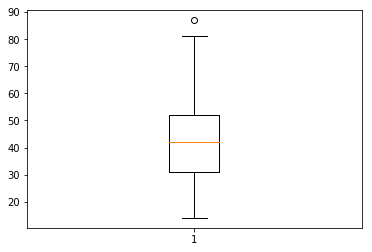

In [42]:
plt.boxplot(datos['Age']);

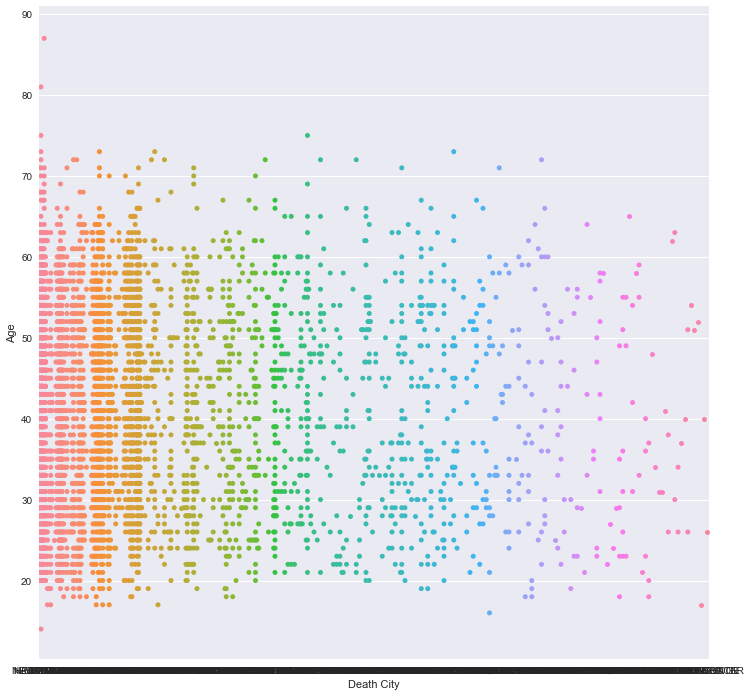

In [47]:
plt.figure(figsize=(12,12))

sns.swarmplot(y=datos['Age'],x=datos['Death City'])

In [72]:
masimportantes = datos[datos['Death City'].isin(bigcities)]

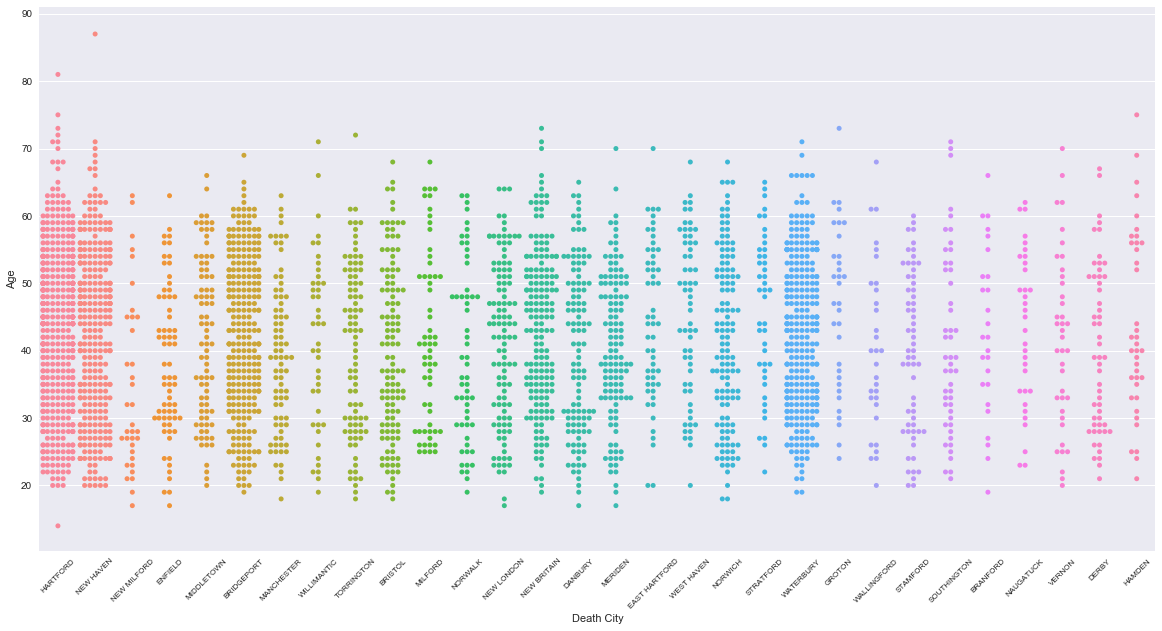

In [82]:
plt.figure(figsize=(20,10))

sns.swarmplot(y=masimportantes['Age'],x=masimportantes['Death City'])
plt.xticks(fontsize =8, rotation = 45);

Text(0,0.5,'Age')

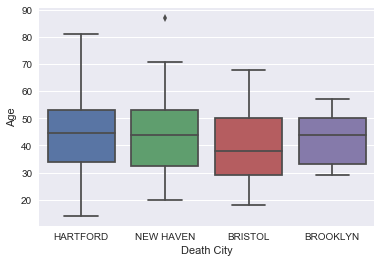

In [83]:
# Part 3: Boxplots of the data

ds_3Cities = datos.loc[datos['Death City'].isin(['NEW HAVEN','BROOKLYN','BRISTOL','HARTFORD'])]

sns.boxplot(x='Death City', y='Age', data=ds_3Cities)

plt.xlabel('Death City')

plt.ylabel('Age')

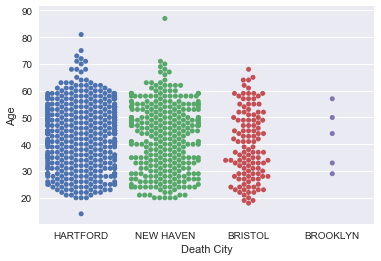

In [84]:
sns.swarmplot(x='Death City', y='Age', data=ds_3Cities)
plt.xlabel('Death City')
plt.ylabel('Age')
plt.show()